In [1]:
%load_ext autoreload
%autoreload 2

%run ../setup_project.py
%run ../neuronAutopi.py

prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList,pose_file_extension = ".pose_kf.npy")

/home/pascal/repo/Jazi_et.al_2023_noInt/setup_project.py:715: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit()
/home/pascal/repo/Jazi_et.al_2023_noInt/setup_project.py:743: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit()
/home/pascal/repo/Jazi_et.al_2023_noInt/setup_project.py:767: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplie

data path: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter
Project name: autopi_ca1
dataPath: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_ca1
Reading /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_ca1/sessionList
We have 39 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:21<00:00,  1.78it/s]

Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


To get our ses.trialList

In [2]:
%%time
myProjectWithTrials = loadMyProjectWithTrials(myProject)

Loading: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_ca1/results/myProjectWithTrials.pickle
CPU times: user 8.32 s, sys: 4.26 s, total: 12.6 s
Wall time: 19.9 s


In [3]:
for ses, sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList)):
    getAccurateHomingIntervals(ses)

39it [00:09,  4.06it/s]


In [4]:
for ses, sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList)):
    getShortSearchIntervals(ses)

39it [00:08,  4.71it/s]


In [5]:
fn=myProject.dataPath+"/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myMaps = pickle.load(handle)
    
fn=myProject.dataPath+"/results/myLeverMapsAccurate.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myLeverMaps = pickle.load(handle)
        
fn=myProject.dataPath+"/results/myLeverMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myLeverMapsLD = pickle.load(handle)
        
fn=myProject.dataPath+"/results/myLeverMapsStatsAccurate.pickle"
with open(fn, 'rb') as handle:
    myLeverMapsStats = pickle.load(handle)
    
    
fn=myProject.dataPath+"/results/myLeverMapsShortSearch.pickle"
with open(fn, 'rb') as handle:
    myLeverMapsShortSearch = pickle.load(handle)

fn=myProject.dataPath+"/results/aroundLeverIFRDict.pickle"
with open(fn, 'rb') as handle:
    trialMat = pickle.load(handle)
 

In [6]:
fn=myProject.dataPath+"/results/leverCells.pickle"
with open(fn, 'rb') as handle:
    leverCells = pickle.load(handle)

## Filter for pyramidal cells

In [7]:
fn=myProject.dataPath+"/results/cell_classification_noint.csv"
ct = pd.read_csv(fn)
ct

,Unnamed: 0,id,session,subject,valid,cellType,meanRate,shank,layer
0,0,mn5824-20112020-0107_80,mn5824-20112020-0107,mn5824,False,NaN,9.201345,4,pyr
1,1,mn5824-20112020-0107_90,mn5824-20112020-0107,mn5824,False,NaN,8.236764,3,pyr
2,2,mn5824-20112020-0107_92,mn5824-20112020-0107,mn5824,True,pyr,7.885922,4,pyr
3,3,mn5824-20112020-0107_96,mn5824-20112020-0107,mn5824,False,NaN,4.153462,1,dn
4,4,mn5824-20112020-0107_98,mn5824-20112020-0107,mn5824,False,NaN,3.411940,4,pyr
...,...,...,...,...,...,...,...,...,...
1075,1263,mn9686-01112021-0106_238,mn9686-01112021-0106,mn9686,False,NaN,4.669745,7,dn
1076,1264,mn9686-01112021-0106_240,mn9686-01112021-0106,mn9686,False,NaN,9.647625,2,pyr
1077,1265,mn9686-01112021-0106_241,mn9686-01112021-0106,mn9686,False,NaN,16.161014,2,pyr
1078,1266,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686,True,pyr,5.270951,1,pyr


In [8]:
if ct.shape[0]!=myMaps["circ80"].shape[0]:
    print("problem with length of cell_classification.csv")

In [9]:
pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("Pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))


Pyramidal cells: 438


In [10]:
for k in myMaps.keys():
    myMaps[k] = myMaps[k][pyrIndices]

In [11]:
for d in [myLeverMaps,myLeverMapsStats, myLeverMapsLD,myLeverMapsShortSearch]:
    for k in d.keys():
        for kk in d[k].keys():
            for kkk in d[k][kk].keys():
                d[k][kk][kkk] = d[k][kk][kkk][pyrIndices]

In [12]:
newMat = {}
for k in trialMat:
    if k in pyrId.values:
        newMat[k]=trialMat[k]
len(newMat.keys())
trialMat = newMat

In [13]:
pyrId = pyrId.reset_index(drop=True)

## Lever cells

We have a list of lever cells identified in `lever_centered_maps_figure.ipynb`

In [14]:
leverCells=leverCells["all_dark"]["none"]

In [15]:

type(leverCells)
type(leverCells['id'])
leverCells['session']= [i.split('_')[0] for i in leverCells['id']]
leverCells['subject']= [cid.split('-')[0] for cid in leverCells.id]
leverCells.groupby(['subject']).describe()

cellIndex                                                            
            count        mean        std    min     25%    50%     75%    max
subject                                                                      
TYY5622       4.0  269.500000   5.972158  263.0  266.00  269.0  272.50  277.0
mn1173       14.0  179.928571  25.168553  147.0  163.75  175.0  192.75  234.0
mn2739       13.0   98.000000   6.658328   87.0   93.00   99.0  103.00  108.0
mn3246       15.0  121.933333   8.795020  109.0  115.00  124.0  127.50  139.0
mn5618        7.0  248.000000   6.480741  240.0  243.50  246.0  253.00  257.0
mn5824        2.0   14.500000  20.506097    0.0    7.25   14.5   21.75   29.0
mn711        17.0   52.352941  16.903924   30.0   36.00   55.0   67.00   82.0
mn9686       37.0  358.864865  49.525057  284.0  316.00  356.0  404.00  436.0

## Check the ratio of pyr/lever anch cells in the first and the last day of recording: 

In [16]:
leverdf= leverCells.reset_index()
leverdf

,index,id,cellIndex,subject,session
0,0,mn5824-20112020-0107_92,0,mn5824,mn5824-20112020-0107
1,29,mn5824-02122020-0106_168,29,mn5824,mn5824-02122020-0106
2,30,mn711-31012021-0107_44,30,mn711,mn711-31012021-0107
3,32,mn711-31012021-0107_47,32,mn711,mn711-31012021-0107
4,33,mn711-31012021-0107_48,33,mn711,mn711-31012021-0107
...,...,...,...,...,...
104,421,mn9686-01112021-0106_45,421,mn9686,mn9686-01112021-0106
105,422,mn9686-01112021-0106_46,422,mn9686,mn9686-01112021-0106
106,432,mn9686-01112021-0106_76,432,mn9686,mn9686-01112021-0106
107,435,mn9686-01112021-0106_197,435,mn9686,mn9686-01112021-0106


In [17]:
pyrdf=pd.DataFrame(pyrId)
pyrdf['subject']= [cid.split('-')[0] for cid in pyrdf.id]
pyrdf['session']= [i.split('_')[0] for i in pyrdf['id']]
pyrdf

,id,subject,session
0,mn5824-20112020-0107_92,mn5824,mn5824-20112020-0107
1,mn5824-20112020-0107_100,mn5824,mn5824-20112020-0107
2,mn5824-20112020-0107_114,mn5824,mn5824-20112020-0107
3,mn5824-20112020-0107_116,mn5824,mn5824-20112020-0107
4,mn5824-20112020-0107_118,mn5824,mn5824-20112020-0107
...,...,...,...
433,mn9686-01112021-0106_79,mn9686,mn9686-01112021-0106
434,mn9686-01112021-0106_81,mn9686,mn9686-01112021-0106
435,mn9686-01112021-0106_197,mn9686,mn9686-01112021-0106
436,mn9686-01112021-0106_242,mn9686,mn9686-01112021-0106


In [18]:
pyrdf.groupby(['subject','session']).count(), leverdf.groupby(['subject','session']).count()

(                               id
 subject session                  
 TYY5622 TYY5622-17092021-0106   8
         TYY5622-19092021-0106  10
         TYY5622-20092021-0106   4
 TYY9524 TYY9524-16082021-0106   2
         TYY9524-18082021-0106   3
 mn1173  mn1173-02052021-0107    6
         mn1173-06052021-0107   43
         mn1173-08052021-0107   24
         mn1173-09052021-0108   15
         mn1173-11052021-0108    2
 mn2739  mn2739-15022021-0105    5
         mn2739-16022021-0106   10
         mn2739-17022021-0106    9
 mn3246  mn3246-09042021-0106   12
         mn3246-10042021-0106   14
         mn3246-12042021-0106    8
         mn3246-14042021-0106    2
 mn5618  mn5618-12072021-0110   19
 mn5824  mn5824-02122020-0106    1
         mn5824-20112020-0107    7
         mn5824-22112020-0107   16
         mn5824-24112020-0107    6
 mn711   mn711-01022021-0107    13
         mn711-02022021-0108    13
         mn711-03022021-0107     8
         mn711-04022021-0107    11
         mn711-31012

In [19]:
pyrlist=list(pyrdf.groupby(['subject','session']).count().id)
sum(pyrlist)

438

In [20]:
leverlist=list(leverdf.groupby(['subject','session']).count().id)
sum(leverlist)

109

In [21]:
pyrdfg= pyrdf.groupby(['subject','session']).count().reset_index()
leverdfg= leverdf.groupby(['subject','session']).count().reset_index()
#####################
######################
#select the sessio
#####################
###################
#pyrsel= pyrdfg[pyrdfg['session'].isin(leverdfg['session'])]
from datetime import datetime


In [22]:
mergdf= pyrdfg.merge(leverdfg,  how='left', on='session', suffixes= ['_pyr','_lever']) ## x is pyrdfg, y is leverdfg
mergdf= mergdf.rename(columns={'id_pyr':'count_pyr','id_lever':'count_lever'})
mergdf['ratio']= mergdf.count_lever/mergdf.count_pyr
mergdf['date']= [datetime.strptime(d.split('-')[1], '%d%m%Y') for d in mergdf.session]
mergdf= mergdf.sort_values('date')
mergdf

,subject_pyr,session,count_pyr,subject_lever,index,count_lever,cellIndex,ratio,date
19,mn5824,mn5824-20112020-0107,7,mn5824,1.0,1.0,1.0,0.142857,2020-11-20
20,mn5824,mn5824-22112020-0107,16,NaN,NaN,NaN,NaN,NaN,2020-11-22
21,mn5824,mn5824-24112020-0107,6,NaN,NaN,NaN,NaN,NaN,2020-11-24
18,mn5824,mn5824-02122020-0106,1,mn5824,1.0,1.0,1.0,1.000000,2020-12-02
26,mn711,mn711-31012021-0107,10,mn711,6.0,6.0,6.0,0.600000,2021-01-31
22,mn711,mn711-01022021-0107,13,mn711,1.0,1.0,1.0,0.076923,2021-02-01
23,mn711,mn711-02022021-0108,13,mn711,5.0,5.0,5.0,0.384615,2021-02-02
24,mn711,mn711-03022021-0107,8,mn711,3.0,3.0,3.0,0.375000,2021-02-03
25,mn711,mn711-04022021-0107,11,mn711,2.0,2.0,2.0,0.181818,2021-02-04
10,mn2739,mn2739-15022021-0105,5,mn2739,2.0,2.0,2.0,0.400000,2021-02-15


In [23]:
def ratio_onelast(sessionlist):
    #print(sessionlist)
    l=sessionlist.iloc[-1].ratio
    f=sessionlist.iloc[0].ratio
    return l,f


In [24]:
df= pd.DataFrame({'fl':mergdf.groupby(['subject_pyr']).apply(ratio_onelast)}).reset_index()
df['first']=[val[0] for val in df.fl]
df['last']=[val[1] for val in df.fl]
df= df.drop('fl', axis=1)

In [25]:
df['first'] = df['first'].fillna(0)
df['last'] = df['last'].fillna(0)
df

,subject_pyr,first,last
0,TYY5622,0.250000,0.125000
1,TYY9524,0.000000,0.000000
2,mn1173,0.500000,0.166667
3,mn2739,0.666667,0.400000
4,mn3246,0.000000,0.500000
5,mn5618,0.368421,0.368421
6,mn5824,1.000000,0.142857
7,mn711,0.181818,0.600000
8,mn9686,0.333333,0.400000


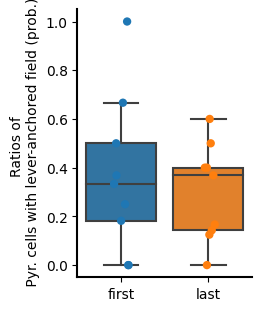

In [26]:
sizePerRow, sizePerCol = 3,2.5
col=1
row=1
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)

sns.boxplot(df, showfliers=False)
sns.stripplot(df,size=6)
ax= fig.gca()
ax.set_ylabel('Ratios of \n Pyr. cells with lever-anchored field (prob.)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.set_tick_params(labelsize= 9)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
plt.show()



In [27]:
from scipy.stats import wilcoxon,ttest_rel

In [28]:
wilcoxon(df['first'], df['last'])

/home/pascal/python_virtual_environments/paprevEnv/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/pascal/python_virtual_environments/paprevEnv/lib/python3.8/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=12.0, pvalue=0.7353166906373405)

In [29]:
#ratiodf.sort_values('date')
